In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = load_dataset(60000,10000)

c:\Users\Golden Snow\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2720524608819797
Max: 244.94693302849612


##### Optimizing at the Initialization Stage

In [10]:
from tensorflow.keras import layers

In [11]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [12]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_zeros = simple_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 [==============================] - 5s 84ms/step - loss: 2.3026 - accuracy: 0.1121 - val_loss: 2.3025 - val_accuracy: 0.1099
Epoch 2/10
19/19 [==============================] - 1s 29ms/step - loss: 2.3025 - accuracy: 0.1133 - val_loss: 2.3025 - val_accuracy: 0.1099
Epoch 3/10
19/19 [==============================] - 1s 31ms/step - loss: 2.3025 - accuracy: 0.1133 - val_loss: 2.3025 - val_accuracy: 0.1099
Epoch 4/10
19/19 [==============================] - 1s 34ms/step - loss: 2.3024 - accuracy: 0.1133 - val_loss: 2.3024 - val_accuracy: 0.1099
Epoch 5/10
19/19 [==============================] - 1s 31ms/step - loss: 2.3024 - accuracy: 0.1133 - val_loss: 2.3024 - val_accuracy: 0.1099
Epoch 6/10
19/19 [==============================] - 1s 45ms/step - loss: 2.3023 - accuracy: 0.1133 - val_loss: 2.3024 - val_accuracy: 0.1099
Epoch 7/10
19/19 [==============================] - 1s 45ms/step - loss: 2.3023 - accuracy: 0.1133 - val_loss: 2.3023 - val_accuracy: 0.1099
Epoch 8/10
19

In [13]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

c:\Users\Golden Snow\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 4s 67ms/step - loss: 2.3010 - accuracy: 0.1139 - val_loss: 2.3010 - val_accuracy: 0.1099
Epoch 2/10
19/19 [==============================] - 0s 26ms/step - loss: 2.3005 - accuracy: 0.1137 - val_loss: 2.3006 - val_accuracy: 0.1099
Epoch 3/10
19/19 [==============================] - 1s 40ms/step - loss: 2.3001 - accuracy: 0.1135 - val_loss: 2.3002 - val_accuracy: 0.1099
Epoch 4/10
19/19 [==============================] - 1s 34ms/step - loss: 2.2997 - accuracy: 0.1133 - val_loss: 2.2998 - val_accuracy: 0.1099
Epoch 5/10
19/19 [==============================] - 1s 27ms/step - loss: 2.2993 - accuracy: 0.1133 - val_loss: 2.2994 - val_accuracy: 0.1099
Epoch 6/10
19/19 [==============================] - 1s 35ms/step - loss: 2.2990 - accuracy: 0.1133 - val_loss: 2.2991 - val_accuracy: 0.1099
Epoch 7/10
19/19 [==============================] - 1s 30ms/step - loss: 2.2986 - accuracy: 0.1133 - val_loss: 2.2987 - val_accuracy: 0.1099
Epoch 8/10
19

In [14]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

c:\Users\Golden Snow\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 3s 75ms/step - loss: 2.3060 - accuracy: 0.1209 - val_loss: 2.2986 - val_accuracy: 0.1439
Epoch 2/10
19/19 [==============================] - 1s 35ms/step - loss: 2.2853 - accuracy: 0.1604 - val_loss: 2.2774 - val_accuracy: 0.1856
Epoch 3/10
19/19 [==============================] - 1s 32ms/step - loss: 2.2635 - accuracy: 0.2010 - val_loss: 2.2546 - val_accuracy: 0.2176
Epoch 4/10
19/19 [==============================] - 0s 25ms/step - loss: 2.2394 - accuracy: 0.2359 - val_loss: 2.2292 - val_accuracy: 0.2442
Epoch 5/10
19/19 [==============================] - 1s 32ms/step - loss: 2.2117 - accuracy: 0.2674 - val_loss: 2.1998 - val_accuracy: 0.2718
Epoch 6/10
19/19 [==============================] - 0s 26ms/step - loss: 2.1794 - accuracy: 0.2947 - val_loss: 2.1652 - val_accuracy: 0.2978
Epoch 7/10
19/19 [==============================] - 0s 25ms/step - loss: 2.1416 - accuracy: 0.3180 - val_loss: 2.1249 - val_accuracy: 0.3162
Epoch 8/10
19

In [15]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

c:\Users\Golden Snow\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 4s 72ms/step - loss: 2.6015 - accuracy: 0.1299 - val_loss: 2.4128 - val_accuracy: 0.1522
Epoch 2/10
19/19 [==============================] - 1s 33ms/step - loss: 2.2753 - accuracy: 0.1838 - val_loss: 2.2100 - val_accuracy: 0.2200
Epoch 3/10
19/19 [==============================] - 1s 29ms/step - loss: 2.1112 - accuracy: 0.2615 - val_loss: 2.0651 - val_accuracy: 0.3110
Epoch 4/10
19/19 [==============================] - 1s 30ms/step - loss: 1.9698 - accuracy: 0.3568 - val_loss: 1.9234 - val_accuracy: 0.4028
Epoch 5/10
19/19 [==============================] - 1s 27ms/step - loss: 1.8212 - accuracy: 0.4478 - val_loss: 1.7690 - val_accuracy: 0.4863
Epoch 6/10
19/19 [==============================] - 1s 30ms/step - loss: 1.6602 - accuracy: 0.5206 - val_loss: 1.6052 - val_accuracy: 0.5501
Epoch 7/10
19/19 [==============================] - 1s 32ms/step - loss: 1.4969 - accuracy: 0.5778 - val_loss: 1.4467 - val_accuracy: 0.6017
Epoch 8/10
19

Text(0, 0.5, 'Validation Accuracy')

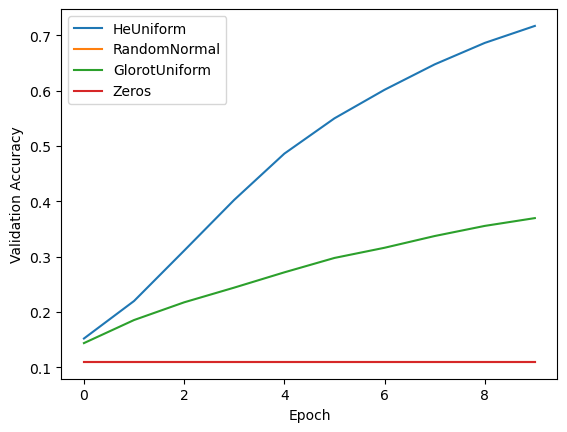

In [16]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [17]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [18]:
simple_model_bn().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)               

In [19]:
init = tf.keras.initializers.random_normal()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

c:\Users\Golden Snow\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 7s 104ms/step - loss: 2.0439 - accuracy: 0.3258 - val_loss: 2.2949 - val_accuracy: 0.1885
Epoch 2/10
19/19 [==============================] - 1s 41ms/step - loss: 1.3632 - accuracy: 0.5829 - val_loss: 2.2837 - val_accuracy: 0.1887
Epoch 3/10
19/19 [==============================] - 1s 44ms/step - loss: 1.0768 - accuracy: 0.6838 - val_loss: 2.2689 - val_accuracy: 0.2024
Epoch 4/10
19/19 [==============================] - 1s 37ms/step - loss: 0.9095 - accuracy: 0.7394 - val_loss: 2.2490 - val_accuracy: 0.2094
Epoch 5/10
19/19 [==============================] - 1s 32ms/step - loss: 0.7936 - accuracy: 0.7757 - val_loss: 2.2224 - val_accuracy: 0.2307
Epoch 6/10
19/19 [==============================] - 1s 34ms/step - loss: 0.7072 - accuracy: 0.8029 - val_loss: 2.1863 - val_accuracy: 0.2705
Epoch 7/10
19/19 [==============================] - 1s 36ms/step - loss: 0.6413 - accuracy: 0.8219 - val_loss: 2.1383 - val_accuracy: 0.3328
Epoch 8/10
1

In [20]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

c:\Users\Golden Snow\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 6s 104ms/step - loss: 1.0981 - accuracy: 0.6732 - val_loss: 2.2962 - val_accuracy: 0.2523
Epoch 2/10
19/19 [==============================] - 1s 46ms/step - loss: 0.4745 - accuracy: 0.8721 - val_loss: 2.2910 - val_accuracy: 0.2616
Epoch 3/10
19/19 [==============================] - 1s 47ms/step - loss: 0.3634 - accuracy: 0.9037 - val_loss: 2.2845 - val_accuracy: 0.2725
Epoch 4/10
19/19 [==============================] - 1s 56ms/step - loss: 0.3084 - accuracy: 0.9181 - val_loss: 2.2758 - val_accuracy: 0.2931
Epoch 5/10
19/19 [==============================] - 1s 41ms/step - loss: 0.2722 - accuracy: 0.9280 - val_loss: 2.2640 - val_accuracy: 0.2958
Epoch 6/10
19/19 [==============================] - 1s 43ms/step - loss: 0.2459 - accuracy: 0.9354 - val_loss: 2.2484 - val_accuracy: 0.3020
Epoch 7/10
19/19 [==============================] - 1s 46ms/step - loss: 0.2241 - accuracy: 0.9416 - val_loss: 2.2284 - val_accuracy: 0.3044
Epoch 8/10
1

In [21]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
19/19 [==============================] - 12s 108ms/step - loss: 0.8682 - accuracy: 0.7347 - val_loss: 2.0623 - val_accuracy: 0.5474
Epoch 2/10
19/19 [==============================] - 1s 44ms/step - loss: 0.2731 - accuracy: 0.9203 - val_loss: 1.8064 - val_accuracy: 0.6746
Epoch 3/10
19/19 [==============================] - 1s 46ms/step - loss: 0.1895 - accuracy: 0.9450 - val_loss: 1.6446 - val_accuracy: 0.7084
Epoch 4/10
19/19 [==============================] - 1s 42ms/step - loss: 0.1427 - accuracy: 0.9585 - val_loss: 1.4644 - val_accuracy: 0.8408
Epoch 5/10
19/19 [==============================] - 1s 37ms/step - loss: 0.1109 - accuracy: 0.9673 - val_loss: 1.3186 - val_accuracy: 0.8563
Epoch 6/10
19/19 [==============================] - 1s 42ms/step - loss: 0.0903 - accuracy: 0.9733 - val_loss: 1.0999 - val_accuracy: 0.8982
Epoch 7/10
19/19 [==============================] - 1s 43ms/step - loss: 0.0769 - accuracy: 0.9771 - val_loss: 0.8961 - val_accuracy: 0.9194
Epoch 8/10


In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

c:\Users\Golden Snow\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 8s 88ms/step - loss: 0.8071 - accuracy: 0.7548 - val_loss: 2.0635 - val_accuracy: 0.4913
Epoch 2/10
19/19 [==============================] - 1s 45ms/step - loss: 0.2550 - accuracy: 0.9251 - val_loss: 1.8461 - val_accuracy: 0.5698
Epoch 3/10
19/19 [==============================] - 1s 38ms/step - loss: 0.1716 - accuracy: 0.9503 - val_loss: 1.6961 - val_accuracy: 0.5751
Epoch 4/10
19/19 [==============================] - 1s 38ms/step - loss: 0.1285 - accuracy: 0.9616 - val_loss: 1.5449 - val_accuracy: 0.6112
Epoch 5/10
19/19 [==============================] - 1s 40ms/step - loss: 0.1003 - accuracy: 0.9702 - val_loss: 1.3401 - val_accuracy: 0.7688
Epoch 6/10
19/19 [==============================] - 1s 41ms/step - loss: 0.0848 - accuracy: 0.9744 - val_loss: 1.1361 - val_accuracy: 0.8508
Epoch 7/10
19/19 [==============================] - 1s 41ms/step - loss: 0.0723 - accuracy: 0.9787 - val_loss: 0.9241 - val_accuracy: 0.8746
Epoch 8/10
19

In [24]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Restoring model weights from the end of the best epoch: 10.
Epoch 20: early stopping
Train Acc: 0.9872833490371704 Test Acc: 0.9620000123977661


In [25]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Restoring model weights from the end of the best epoch: 7.
Epoch 17: early stopping
Train Acc: 0.9855499863624573 Test Acc: 0.9668999910354614
